# Overview: 

The Metropolitan Transportation Authority (MTA) is the entity responsible over New York state subway system, recently they require to install Wi-Fi network in the subway stations to minimize the inconveniences that might results due to the wait time before train arrival by keeping the daily commuters well connected. The MTA contracted us as a consultancy group to advise on a working plan for this project.


In [1]:
#First we will upload the dataset in the ipython environment to start the MTA data exploration
#Using pandas and sqlalchemy libraries

import pandas as pd
from flask_sqlalchemy import SQLAlchemy
from sqlalchemy import create_engine


In [2]:
#Get the MTA data within the desired datetime range

def get_data(week_nums):
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
    dfs = []
    for week_num in week_nums:
        file_url = url.format(week_num)
        dfs.append(pd.read_csv(file_url))
    return pd.concat(dfs)

In [3]:
# The dataset used running data for the months of July, August and Septemeber of 2021
data_weeks = [210703,210710,210717,210724,210731,
              210807,210814,210821,210828,
              210904,210911,210918,210925,
              211002]
get_data(data_weeks)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/26/2021,00:00:00,REGULAR,7592792,2595706
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/26/2021,04:00:00,REGULAR,7592804,2595713
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/26/2021,08:00:00,REGULAR,7592816,2595729
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/26/2021,12:00:00,REGULAR,7592870,2595762
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/26/2021,16:00:00,REGULAR,7592992,2595791
...,...,...,...,...,...,...,...,...,...,...,...
210206,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,10/01/2021,05:00:00,REGULAR,5554,649
210207,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,10/01/2021,09:00:00,REGULAR,5554,649
210208,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,10/01/2021,13:00:00,REGULAR,5554,649
210209,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,10/01/2021,17:00:00,REGULAR,5554,649


In [4]:
#Storing the dataset in pandas dataframe to be able to manipulate it
my_df = get_data(data_weeks)
engine = create_engine("sqlite:///MTA_db.db")
my_df.to_sql('MTA_table', engine, if_exists = 'replace', index=False)

In [5]:
tables = engine.table_names()
print(tables)

['MTA_table']


/var/folders/4y/plz6nn617g3gccj1l9_90bhc0000gn/T/ipykernel_3542/1698560817.py:1: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  tables = engine.table_names()


In [6]:
my_df=pd.read_sql('select * from MTA_table', engine)
my_df.tail()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
2934624,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,10/01/2021,05:00:00,REGULAR,5554,649
2934625,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,10/01/2021,09:00:00,REGULAR,5554,649
2934626,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,10/01/2021,13:00:00,REGULAR,5554,649
2934627,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,10/01/2021,17:00:00,REGULAR,5554,649
2934628,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,10/01/2021,21:00:00,REGULAR,5554,650


In [7]:
#Removing the leading and trailing whitespaces using strip() function
my_df.columns.str.strip()

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [8]:
#The dataframe below represents a snippet of the data (the first 4 rows)
my_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/26/2021,00:00:00,REGULAR,7592792,2595706
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/26/2021,04:00:00,REGULAR,7592804,2595713
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/26/2021,08:00:00,REGULAR,7592816,2595729
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/26/2021,12:00:00,REGULAR,7592870,2595762
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/26/2021,16:00:00,REGULAR,7592992,2595791


- We can create a new column to combine both the date and time

In [9]:
my_df['DATETIME'] = pd.to_datetime(my_df.DATE + ' ' + my_df.TIME)

In [10]:
my_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/26/2021,00:00:00,REGULAR,7592792,2595706,2021-06-26 00:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/26/2021,04:00:00,REGULAR,7592804,2595713,2021-06-26 04:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/26/2021,08:00:00,REGULAR,7592816,2595729,2021-06-26 08:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/26/2021,12:00:00,REGULAR,7592870,2595762,2021-06-26 12:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/26/2021,16:00:00,REGULAR,7592992,2595791,2021-06-26 16:00:00


In [11]:
#Check for NA vlaues in the dataset
#The following two runs shows that there are no observations of type 'NA'
my_df.isna()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2934624,False,False,False,False,False,False,False,False,False,False,False,False
2934625,False,False,False,False,False,False,False,False,False,False,False,False
2934626,False,False,False,False,False,False,False,False,False,False,False,False
2934627,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
my_df.isna().sum()

C/A                                                                     0
UNIT                                                                    0
SCP                                                                     0
STATION                                                                 0
LINENAME                                                                0
DIVISION                                                                0
DATE                                                                    0
TIME                                                                    0
DESC                                                                    0
ENTRIES                                                                 0
EXITS                                                                   0
DATETIME                                                                0
dtype: int64

In [13]:
#sorting values in an ascending order to check for duplicates per turnstile per date
#The following 3 runs check for any duplicate observations within the time range used for this analysis

my_df.sort_values(['C/A','UNIT','SCP','STATION','DATETIME'], ascending = True)


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/26/2021,00:00:00,REGULAR,7592792,2595706,2021-06-26 00:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/26/2021,04:00:00,REGULAR,7592804,2595713,2021-06-26 04:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/26/2021,08:00:00,REGULAR,7592816,2595729,2021-06-26 08:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/26/2021,12:00:00,REGULAR,7592870,2595762,2021-06-26 12:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/26/2021,16:00:00,REGULAR,7592992,2595791,2021-06-26 16:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
2934624,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,10/01/2021,05:00:00,REGULAR,5554,649,2021-10-01 05:00:00
2934625,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,10/01/2021,09:00:00,REGULAR,5554,649,2021-10-01 09:00:00
2934626,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,10/01/2021,13:00:00,REGULAR,5554,649,2021-10-01 13:00:00
2934627,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,10/01/2021,17:00:00,REGULAR,5554,649,2021-10-01 17:00:00


In [14]:
my_df.duplicated().sum()

0

In [15]:
#Locating the duplicate rows if any
my_df.loc[my_df.duplicated(), :]

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME


In [16]:
#Get the count of entries for each Turnstile and check for duplicates
#The results shows that there are two entries for the same turnstile in the same DATETIME series 
my_df.groupby(["C/A", "UNIT", "SCP", "STATION", "DATETIME"]).ENTRIES.count().reset_index().sort_values("ENTRIES", ascending=False)

,C/A,UNIT,SCP,STATION,DATETIME,ENTRIES
2911468,S101,R070,00-00-02,ST. GEORGE,2021-09-15 08:00:00,2
2911391,S101,R070,00-00-02,ST. GEORGE,2021-09-02 20:00:00,2
2911401,S101,R070,00-00-02,ST. GEORGE,2021-09-04 12:00:00,2
2911400,S101,R070,00-00-02,ST. GEORGE,2021-09-04 08:00:00,2
2911398,S101,R070,00-00-02,ST. GEORGE,2021-09-04 00:00:00,2
...,...,...,...,...,...,...
978170,N128,R200,00-00-03,EUCLID AV,2021-07-31 04:00:00,1
978171,N128,R200,00-00-03,EUCLID AV,2021-07-31 08:00:00,1
978172,N128,R200,00-00-03,EUCLID AV,2021-07-31 12:00:00,1
978173,N128,R200,00-00-03,EUCLID AV,2021-07-31 16:00:00,1


In [17]:
import datetime

test = ((my_df['C/A'] == 'R516') &
        (my_df['UNIT'] == 'R291') &
        (my_df['SCP'] == '00-00-02') &
        (my_df['STATION'] == '33 ST-RAWSON ST') &
        (my_df['DATETIME'].dt.date == datetime.datetime(2021, 8 , 25).date()))

In [18]:
my_df[test].tail()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME
1864708,R516,R291,00-00-02,33 ST-RAWSON ST,7,IRT,08/25/2021,12:00:00,RECOVR AUD,1535620,1649485,2021-08-25 12:00:00
1864709,R516,R291,00-00-02,33 ST-RAWSON ST,7,IRT,08/25/2021,16:00:00,REGULAR,10991727,8495220,2021-08-25 16:00:00
1864710,R516,R291,00-00-02,33 ST-RAWSON ST,7,IRT,08/25/2021,16:00:00,RECOVR AUD,1535734,1649537,2021-08-25 16:00:00
1864711,R516,R291,00-00-02,33 ST-RAWSON ST,7,IRT,08/25/2021,20:00:00,REGULAR,10991870,8495226,2021-08-25 20:00:00
1864712,R516,R291,00-00-02,33 ST-RAWSON ST,7,IRT,08/25/2021,20:00:00,RECOVR AUD,1535925,1649602,2021-08-25 20:00:00


* The results above shows that there are more than 1 row for the same turnstile per entries, the difference between the two entries are the DESC column which has a Reguler audit and a Recovered Audit.
* For the sake of simplicity, the Recovered Audit columns will be dropped.

In [19]:
my_df.drop(my_df[my_df['DESC'] == 'RECOVR AUD'].index , axis=0, inplace=True)

In [20]:
#checking the drop was done correctly
my_df[test].tail()

/var/folders/4y/plz6nn617g3gccj1l9_90bhc0000gn/T/ipykernel_3542/2925128706.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  my_df[test].tail()


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME
1864703,R516,R291,00-00-02,33 ST-RAWSON ST,7,IRT,08/25/2021,04:00:00,REGULAR,10991599,8495017,2021-08-25 04:00:00
1864705,R516,R291,00-00-02,33 ST-RAWSON ST,7,IRT,08/25/2021,08:00:00,REGULAR,10991607,8495122,2021-08-25 08:00:00
1864707,R516,R291,00-00-02,33 ST-RAWSON ST,7,IRT,08/25/2021,12:00:00,REGULAR,10991639,8495203,2021-08-25 12:00:00
1864709,R516,R291,00-00-02,33 ST-RAWSON ST,7,IRT,08/25/2021,16:00:00,REGULAR,10991727,8495220,2021-08-25 16:00:00
1864711,R516,R291,00-00-02,33 ST-RAWSON ST,7,IRT,08/25/2021,20:00:00,REGULAR,10991870,8495226,2021-08-25 20:00:00


In [21]:
#checking for duplicate observations again
my_df.groupby(["C/A", "UNIT", "SCP", "STATION", "DATETIME"]).ENTRIES.count().reset_index().sort_values("ENTRIES", ascending=False)

,C/A,UNIT,SCP,STATION,DATETIME,ENTRIES
0,A002,R051,02-00-00,59 ST,2021-06-26 00:00:00,1
1946622,R138,R293,00-06-00,34 ST-PENN STA,2021-09-17 14:00:00,1
1946602,R138,R293,00-06-00,34 ST-PENN STA,2021-09-14 06:00:00,1
1946603,R138,R293,00-06-00,34 ST-PENN STA,2021-09-14 10:00:00,1
1946604,R138,R293,00-06-00,34 ST-PENN STA,2021-09-14 14:00:00,1
...,...,...,...,...,...,...
973306,N128,R200,00-00-03,EUCLID AV,2021-09-13 00:00:00,1
973307,N128,R200,00-00-03,EUCLID AV,2021-09-13 04:00:00,1
973308,N128,R200,00-00-03,EUCLID AV,2021-09-13 08:00:00,1
973309,N128,R200,00-00-03,EUCLID AV,2021-09-13 12:00:00,1


* The following steps will focus on understanding the data and discover any anomalies

In [22]:
my_df.DESC.value_counts()

REGULAR    2919912
Name: DESC, dtype: int64

In [23]:
my_df.shape

(2919912, 12)

In [24]:
my_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919912 entries, 0 to 2934628
Data columns (total 12 columns):
 #   Column                                                                Dtype         
---  ------                                                                -----         
 0   C/A                                                                   object        
 1   UNIT                                                                  object        
 2   SCP                                                                   object        
 3   STATION                                                               object        
 4   LINENAME                                                              object        
 5   DIVISION                                                              object        
 6   DATE                                                                  object        
 7   TIME                                                                  ob

In [25]:
#looking at the descriptive values for the commulative Entries and Exists as a ballpark number doesn't make sense,
#so we need to get the unique daily Entries to understand the problem statment better. P.S. the Exits won't be 
#looked at in this analysis as our focus is to get a sense of the traffic per station per day and it can be deduced
#fairly from the daily Entries only.
my_df.describe()

,ENTRIES,EXITS
count,2.919912e+06,2.919912e+06
mean,4.149555e+07,3.322832e+07
std,2.181855e+08,1.918885e+08
min,0.000000e+00,0.000000e+00
25%,2.203418e+05,1.033300e+05
50%,1.397294e+06,8.541220e+05
75%,5.997214e+06,3.974544e+06
max,2.147407e+09,2.133797e+09


* The following few steps is to create a new column for unique daily entries and to check for any anomalies 

In [28]:
#creating a turnstile_id for simplicity of coding
my_df['Turnstile_ID'] = my_df['C/A'].astype(str) + '_' + my_df.UNIT.astype(str) + '_' + \
my_df.SCP.astype(str) + '_' + my_df.STATION.astype(str)

In [30]:
my_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME,Turnstile_ID
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/26/2021,00:00:00,REGULAR,7592792,2595706,2021-06-26 00:00:00,A002_R051_02-00-00_59 ST
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/26/2021,04:00:00,REGULAR,7592804,2595713,2021-06-26 04:00:00,A002_R051_02-00-00_59 ST
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/26/2021,08:00:00,REGULAR,7592816,2595729,2021-06-26 08:00:00,A002_R051_02-00-00_59 ST
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/26/2021,12:00:00,REGULAR,7592870,2595762,2021-06-26 12:00:00,A002_R051_02-00-00_59 ST
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/26/2021,16:00:00,REGULAR,7592992,2595791,2021-06-26 16:00:00,A002_R051_02-00-00_59 ST


In [31]:
#For the purpose of this analysis, looking at the traffic per station is enough to take decisions where to start 
#the work to install the Wi-Fi Netwrok as opposed to looking at it at a granual level per Turnstile
station_df = my_df.groupby(['STATION','DATE'])['ENTRIES'].max().reset_index()

station_df

,STATION,DATE,ENTRIES
0,1 AV,06/26/2021,370891078
1,1 AV,06/27/2021,370891152
2,1 AV,06/28/2021,370891228
3,1 AV,06/29/2021,370891317
4,1 AV,06/30/2021,370891419
...,...,...,...
37087,ZEREGA AV,09/27/2021,1308054
37088,ZEREGA AV,09/28/2021,1308726
37089,ZEREGA AV,09/29/2021,1309387
37090,ZEREGA AV,09/30/2021,1310068


In [37]:
station_df.sort_values(['STATION','DATE'], ascending=True)

station_df

,STATION,DATE,ENTRIES
0,1 AV,06/26/2021,370891078
1,1 AV,06/27/2021,370891152
2,1 AV,06/28/2021,370891228
3,1 AV,06/29/2021,370891317
4,1 AV,06/30/2021,370891419
...,...,...,...
37087,ZEREGA AV,09/27/2021,1308054
37088,ZEREGA AV,09/28/2021,1308726
37089,ZEREGA AV,09/29/2021,1309387
37090,ZEREGA AV,09/30/2021,1310068


In [38]:
station_df[['PREV_DATE','PREV_ENTRIES']] = station_df.groupby(['STATION'])['DATE','ENTRIES'] \
.apply(lambda x: x.shift(periods = 1, axis = 0, fill_value = 0))

station_df


/var/folders/4y/plz6nn617g3gccj1l9_90bhc0000gn/T/ipykernel_3542/518037491.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  station_df[['PREV_DATE','PREV_ENTRIES']] = station_df.groupby(['STATION'])['DATE','ENTRIES'] \


,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
0,1 AV,06/26/2021,370891078,0,0
1,1 AV,06/27/2021,370891152,06/26/2021,370891078
2,1 AV,06/28/2021,370891228,06/27/2021,370891152
3,1 AV,06/29/2021,370891317,06/28/2021,370891228
4,1 AV,06/30/2021,370891419,06/29/2021,370891317
...,...,...,...,...,...
37087,ZEREGA AV,09/27/2021,1308054,09/26/2021,1307428
37088,ZEREGA AV,09/28/2021,1308726,09/27/2021,1308054
37089,ZEREGA AV,09/29/2021,1309387,09/28/2021,1308726
37090,ZEREGA AV,09/30/2021,1310068,09/29/2021,1309387


In [39]:
#Now let add one more column in the dataframe to get the unique daily entries 
station_df['DAILY_ENTRIES'] = station_df.ENTRIES - station_df.PREV_ENTRIES

station_df

,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
0,1 AV,06/26/2021,370891078,0,0,370891078
1,1 AV,06/27/2021,370891152,06/26/2021,370891078,74
2,1 AV,06/28/2021,370891228,06/27/2021,370891152,76
3,1 AV,06/29/2021,370891317,06/28/2021,370891228,89
4,1 AV,06/30/2021,370891419,06/29/2021,370891317,102
...,...,...,...,...,...,...
37087,ZEREGA AV,09/27/2021,1308054,09/26/2021,1307428,626
37088,ZEREGA AV,09/28/2021,1308726,09/27/2021,1308054,672
37089,ZEREGA AV,09/29/2021,1309387,09/28/2021,1308726,661
37090,ZEREGA AV,09/30/2021,1310068,09/29/2021,1309387,681


In [40]:
#Now let check the descriptive figures for the unique daily entries 
station_df['DAILY_ENTRIES'].describe()

count    3.709200e+04
mean     3.526291e+06
std      7.681926e+07
min     -1.942719e+09
25%      1.220000e+02
50%      3.820000e+02
75%      6.820000e+02
max      2.147407e+09
Name: DAILY_ENTRIES, dtype: float64

* The unique daily entries shows negative minimum value, which is not correct given that the daily entries should be cummulative 

In [41]:
station_df.dtypes

STATION          object
DATE             object
ENTRIES           int64
PREV_DATE        object
PREV_ENTRIES      int64
DAILY_ENTRIES     int64
dtype: object

In [42]:
station_df.PREV_ENTRIES = station_df.PREV_ENTRIES.astype(int)
station_df.DAILY_ENTRIES = station_df.DAILY_ENTRIES.astype(int)


In [44]:
#lets take a subset of the dataframe to check how are the rows of negative value looking like

station_df[station_df.DAILY_ENTRIES < 0]

,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
295,104 ST,06/27/2021,1681050247,06/26/2021,1681050263,-16
296,104 ST,06/28/2021,1681050222,06/27/2021,1681050247,-25
297,104 ST,06/29/2021,1681050128,06/28/2021,1681050222,-94
298,104 ST,06/30/2021,1681050016,06/29/2021,1681050128,-112
299,104 ST,07/01/2021,1681049915,06/30/2021,1681050016,-101
...,...,...,...,...,...,...
34644,TIMES SQ-42 ST,10/01/2021,1891091412,09/30/2021,1891091983,-571
35080,UTICA AV,08/10/2021,17025492,08/09/2021,102825308,-85799816
35117,UTICA AV,09/16/2021,17089093,09/15/2021,102825371,-85736278
36462,WINTHROP ST,08/20/2021,1961869,08/19/2021,19163917,-17202048


* I am observing two abnormal patterns here: 
    1. The first one is the negative daily entries (which is most likly to be erronous entries where passengers reversed the turnstile wheel or somthing of that sort).
    2. The second one is the unexpected big difference between the ENTRIES and the PREV_ENTRIES, where ENTRIES is a lot more smaller than the PREV_ENTRIES and here I will assume if something like this happens then the commulative counter has been reset.
* In the next few steps, we will be working on fixing these anomalies.

In [54]:
station_df.dtypes

STATION          object
DATE             object
ENTRIES           int64
PREV_DATE        object
PREV_ENTRIES      int64
DAILY_ENTRIES     int64
dtype: object

In [57]:
station_df['DATE'] = pd.to_datetime(station_df['DATE'])

#df['Date'] = pd.to_datetime(df['Date'])
#df['Month'] = df['Date'].dt.month

In [58]:
station_df['PREV_DATE'] = pd.to_datetime(station_df['PREV_DATE'])

In [59]:
station_df.dtypes

STATION                  object
DATE             datetime64[ns]
ENTRIES                   int64
PREV_DATE        datetime64[ns]
PREV_ENTRIES              int64
DAILY_ENTRIES             int64
dtype: object

In [66]:
station_df[(station_df['STATION'] == 'UTICA AV') & (station_df['DATE'] >= '2021-08-01') \
          & (station_df['DATE'] <= '2021-08-31')]

#created a subset of the UTICA AV station for the month of August, where I saw one of the anomalies above;
#to try and understand the problem at hand

,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
35071,UTICA AV,2021-08-01,102822537,2021-07-31,102822333,204
35072,UTICA AV,2021-08-02,102822960,2021-08-01,102822537,423
35073,UTICA AV,2021-08-03,102823496,2021-08-02,102822960,536
35074,UTICA AV,2021-08-04,102823961,2021-08-03,102823496,465
35075,UTICA AV,2021-08-05,102824368,2021-08-04,102823961,407
35076,UTICA AV,2021-08-06,102824770,2021-08-05,102824368,402
35077,UTICA AV,2021-08-07,102824993,2021-08-06,102824770,223
35078,UTICA AV,2021-08-08,102825159,2021-08-07,102824993,166
35079,UTICA AV,2021-08-09,102825308,2021-08-08,102825159,149
35080,UTICA AV,2021-08-10,17025492,2021-08-09,102825308,-85799816


In [70]:
#ok lets check the maximum daily entries in the datframe then assign a threshold accordingly to reset
#the counter to zero if we encounter a value thats even bigger than out threshold

mask = station_df.groupby(['STATION','DATE'])['DAILY_ENTRIES'].max().reset_index(). \
sort_values('DAILY_ENTRIES')

mask

,STATION,DATE,DAILY_ENTRIES
812,121 ST,2021-07-24,-1942719354
816,121 ST,2021-07-28,-1942718733
17094,CANARSIE-ROCKAW,2021-08-27,-1526315613
17123,CANARSIE-ROCKAW,2021-09-25,-1526304935
21091,FLATBUSH AV-B.C,2021-08-10,-1374037426
...,...,...,...
13700,BAYCHESTER AV,2021-06-26,2064066499
18893,COURT SQ,2021-06-26,2066596158
17619,CHAMBERS ST,2021-06-26,2116123427
1274,14 ST,2021-06-26,2128673609


In [72]:
def get_daily_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter < 0:
        counter = -counter
    if counter > max_counter:
        print(row["ENTRIES"], row["PREV_ENTRIES"])
        counter = min(row["ENTRIES"], row["PREV_ENTRIES"])
    if counter > max_counter:
        return 0
    return counter

station_df["DAILY_ENTRIES"] = station_df.apply(get_daily_counts, axis=1, max_counter=1000000)

370891078 0
26181733 0
16478308 0
1681050263 0
14759168 0
50331896 0
185712452 0
1160300472 0
1946272192 0
3588552 1946307906
1946307906 3588742
3589173 1946307906
1946307918 3589617
1862989314 0
1828826573 0
855499479 1828837016
1828838087 855499479
18110479 0
991789060 0
2128673609 0
71309890 0
135439844 0
168165376 0
117444360 168165376
168165376 117444360
117444362 168165376
168165376 117444362
118374824 0
9411864 0
4283666 0
1711662138 0
9408595 0
1827866929 0
53804509 0
7603219 0
934214846 0
688206350 0
4690122 0
218418454 0
8006802 0
1946899327 0
102509856 0
1610418813 0
1475181684 0
1781739185 0
1441542729 0
654494788 0
67422098 0
8195885 0
135364871 0
3572194 0
16852032 0
4439476 0
906519329 0
1953908903 0
2000315733 0
16256532 0
87066800 0
8975569 0
5311973 0
11770280 0
1174478619 0
8207442 0
2046134325 0
1309228109 0
12706329 0
120082116 0
117440512 0
10982525 117440512
117440512 10983176
1253846890 0
5228851 0
1569885666 0
17863225 0
101226828 0
4549946 0
12596977 0
2172634

In [73]:
station_df['DAILY_ENTRIES'].describe()

count     37092.000000
mean        773.418392
std       13451.616270
min           0.000000
25%         174.000000
50%         417.000000
75%         705.000000
max      952501.000000
Name: DAILY_ENTRIES, dtype: float64

In [75]:
station_df[station_df.DAILY_ENTRIES < 0]

,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES


* OK! Now that we have cleaned up the dataframem let's answer the following: <br>
    • What are the busiest train stations across New York City? <br>

In [85]:
station_df

,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
0,1 AV,2021-06-26,370891078,1970-01-01,0,0
1,1 AV,2021-06-27,370891152,2021-06-26,370891078,74
2,1 AV,2021-06-28,370891228,2021-06-27,370891152,76
3,1 AV,2021-06-29,370891317,2021-06-28,370891228,89
4,1 AV,2021-06-30,370891419,2021-06-29,370891317,102
...,...,...,...,...,...,...
37087,ZEREGA AV,2021-09-27,1308054,2021-09-26,1307428,626
37088,ZEREGA AV,2021-09-28,1308726,2021-09-27,1308054,672
37089,ZEREGA AV,2021-09-29,1309387,2021-09-28,1308726,661
37090,ZEREGA AV,2021-09-30,1310068,2021-09-29,1309387,681


In [113]:
station_df['DATE'] = pd.to_datetime(station_df['DATE'], errors='coerce')
station_df.dtypes

STATION                  object
DATE             datetime64[ns]
ENTRIES                   int64
PREV_DATE        datetime64[ns]
PREV_ENTRIES              int64
DAILY_ENTRIES             int64
dtype: object

In [114]:
station_df['weekNumber'] = station_df['DATE'].dt.week

/var/folders/4y/plz6nn617g3gccj1l9_90bhc0000gn/T/ipykernel_3542/3323928275.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  station_df['weekNumber'] = station_df['DATE'].dt.week


In [115]:
station_df

,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES,weekNumber
0,1 AV,2021-06-26,370891078,1970-01-01,0,0,25
1,1 AV,2021-06-27,370891152,2021-06-26,370891078,74,25
2,1 AV,2021-06-28,370891228,2021-06-27,370891152,76,26
3,1 AV,2021-06-29,370891317,2021-06-28,370891228,89,26
4,1 AV,2021-06-30,370891419,2021-06-29,370891317,102,26
...,...,...,...,...,...,...,...
37087,ZEREGA AV,2021-09-27,1308054,2021-09-26,1307428,626,39
37088,ZEREGA AV,2021-09-28,1308726,2021-09-27,1308054,672,39
37089,ZEREGA AV,2021-09-29,1309387,2021-09-28,1308726,661,39
37090,ZEREGA AV,2021-09-30,1310068,2021-09-29,1309387,681,39


In [130]:
busiest_station = station_df.groupby(['weekNumber','STATION'])['DAILY_ENTRIES'].sum().reset_index().\
sort_values('DAILY_ENTRIES', ascending = False)
#df.groupby(month('date')).agg({'Revenue': 'sum'})
#b.groupby(by=[b.index.month, b.index.year])

In [131]:
busiest_station

,weekNumber,STATION,DAILY_ENTRIES
258,25,JOURNAL SQUARE,953564
181,25,CHAUNCEY ST,932938
235,25,GROVE STREET,822180
256,25,JFK JAMAICA CT1,751924
184,25,CITY / BUS,738037
...,...,...,...
1470,28,ROCKAWAY PARK B,0
5446,39,BEACH 105 ST,0
4952,38,170 ST,0
405,26,170 ST,0


In [138]:
test1 = busiest_station.groupby(['STATION'])['DAILY_ENTRIES'].mean().reset_index().\
sort_values('DAILY_ENTRIES', ascending = False).head(10)

In [139]:
test1

,STATION,DAILY_ENTRIES
256,JFK JAMAICA CT1,74714.466667
258,JOURNAL SQUARE,72213.733333
181,CHAUNCEY ST,65311.933333
235,GROVE STREET,62278.066667
184,CITY / BUS,54328.333333
351,THIRTY ST,53497.200000
298,NEWARK BM BW,46346.066667
352,THIRTY THIRD ST,46237.466667
354,TOMPKINSVILLE,45850.533333
315,PATH NEW WTC,40581.733333


[Text(0.5, 0, 'AVG 12 Weeks Station Entries'),
 Text(0.5, 1.0, 'Top Ten Busiest Subway Stations in NYC')]

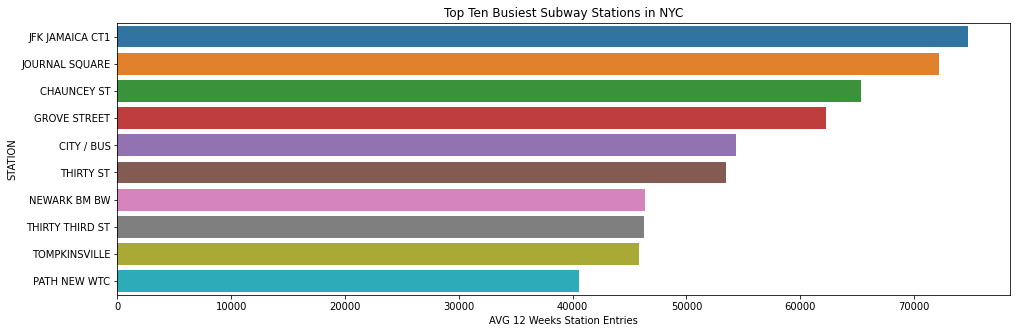

In [157]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

fig_dims = (16, 5)
fig, ax = plt.subplots(figsize=fig_dims)

my_plot = sns.barplot(x ='DAILY_ENTRIES', y='STATION',ax=ax, data=test1)
my_plot.set(xlabel="AVG 12 Weeks Station Entries",title='Top Ten Busiest Subway Stations in NYC')